In [ ]:
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda date: ast.literal_eval(date) if pd.notna(date) else date)

In [43]:
df_us_da = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_us_da = df_us_da.dropna(subset=['salary_year_avg'])

#### Bar Chart

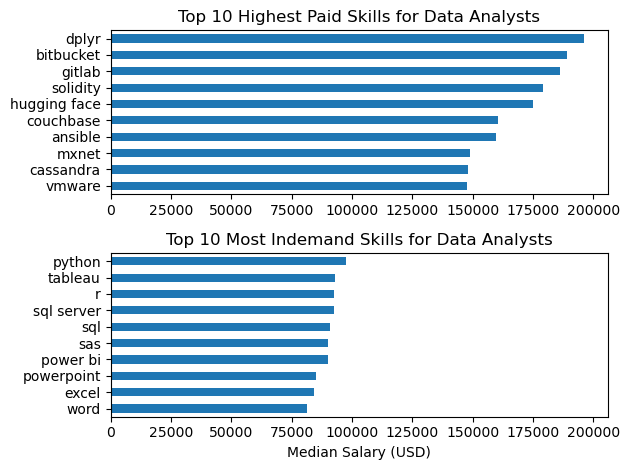

In [ ]:
df_us_da = df_us_da.explode('job_skills')
df_us_da_group = df_us_da.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])
df_da_top_pay = df_us_da_group.sort_values(by='median', ascending=False).head(10)
df_da_skills = df_us_da_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)
fig, ax = plt.subplots(2, 1)

df_da_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')

df_da_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most Indemand Skills for Data Analysts')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_ylabel('')
ax[1].set_xlim(ax[0].set_xlim())

fig.tight_layout()
plt.show()

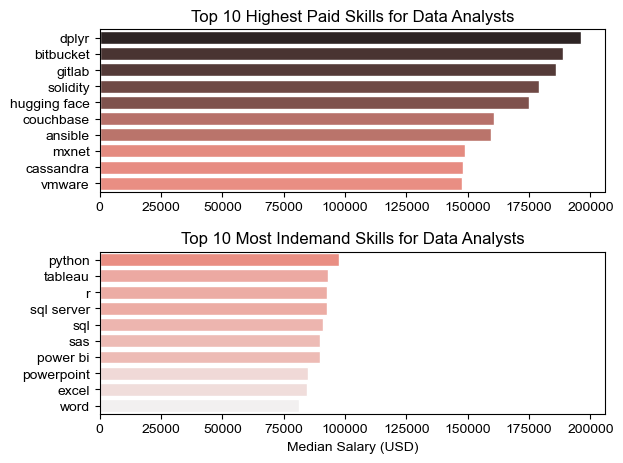

In [ ]:
fig, ax = plt.subplots(2, 1)

sns.set_theme(style="ticks")


sns.barplot(data=df_da_top_pay, x='median', y=df_da_top_pay.index, ax=ax[0], hue='median', palette='dark:salmon_r')
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].legend().remove()


sns.barplot(data=df_da_skills, x='median', y=df_da_skills.index, ax=ax[1], hue='median', palette='light:salmon')
#df_da_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most Indemand Skills for Data Analysts')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_ylabel('')
ax[1].set_xlim(ax[0].set_xlim())
ax[1].legend().remove()

fig.tight_layout()
plt.show()

#### Histograms

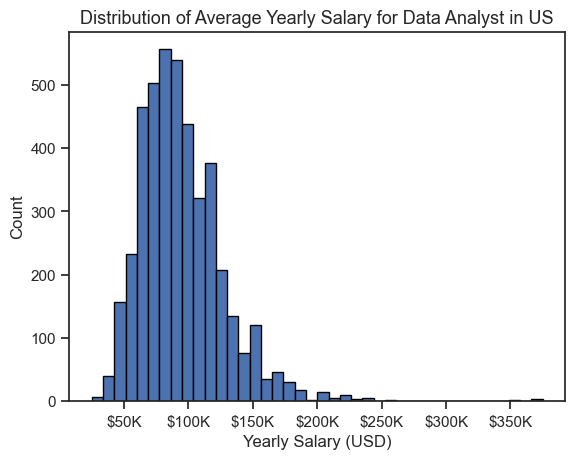

In [48]:
df_us_da['salary_year_avg'].plot(kind='hist', bins=40, edgecolor='black')

plt.title('Distribution of Average Yearly Salary for Data Analyst in US', fontsize=13)
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Count')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.show()


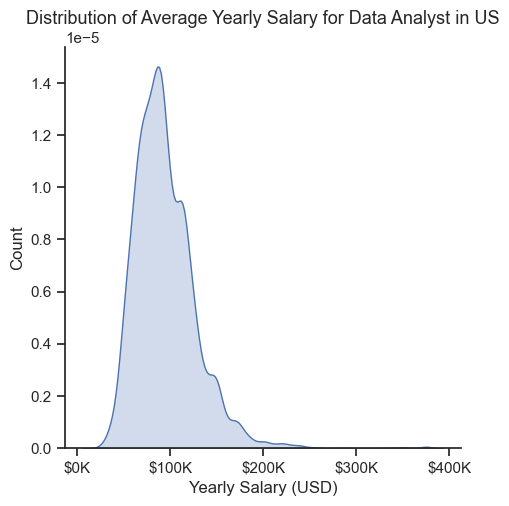

In [51]:
sns.displot(df_us_da['salary_year_avg'], kind='kde', fill=True)
plt.title('Distribution of Average Yearly Salary for Data Analyst in US', fontsize=13)
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Count')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.show()

#### Box Plot

C:\Users\USER\AppData\Local\Temp\ipykernel_13968\1821871419.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


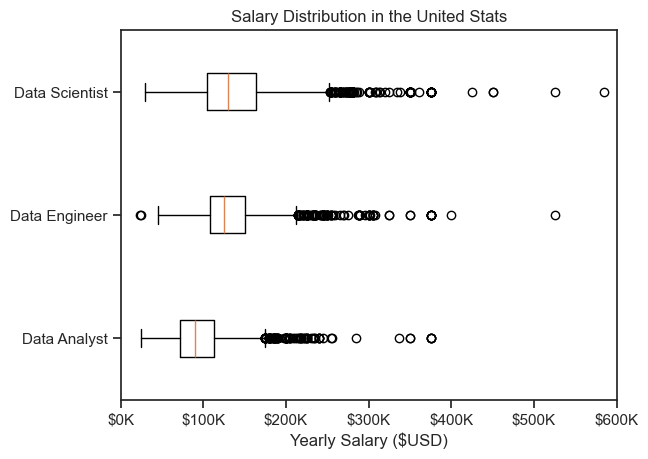

In [52]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_us = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_us = df_us.dropna(subset=['salary_year_avg'])

job_list = [df_us[df_us['job_title_short'] == title]['salary_year_avg'] for title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution in the United Stats')
plt.xlabel('Yearly Salary ($USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()

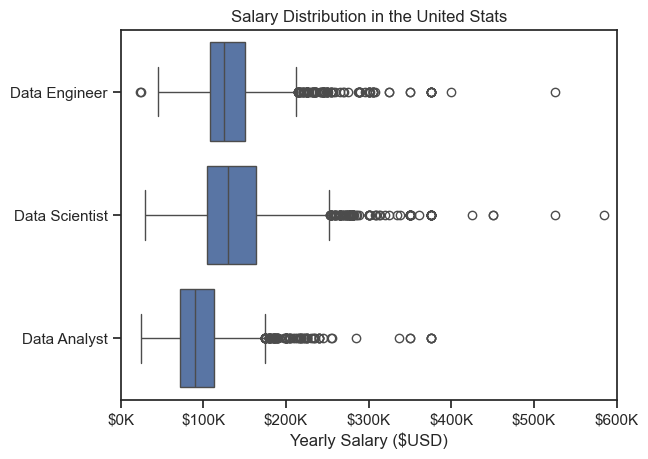

In [56]:
sns.boxplot(data=df_us, x='salary_year_avg', y='job_title_short')
plt.title('Salary Distribution in the United Stats')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()

## Practice Problems

 ### Top Companies Bar Plot
 Create a Seaborn bar plot to visualize the top 5 companies with the highest median salary_year_avg for Data Scientist job postings in the United States.

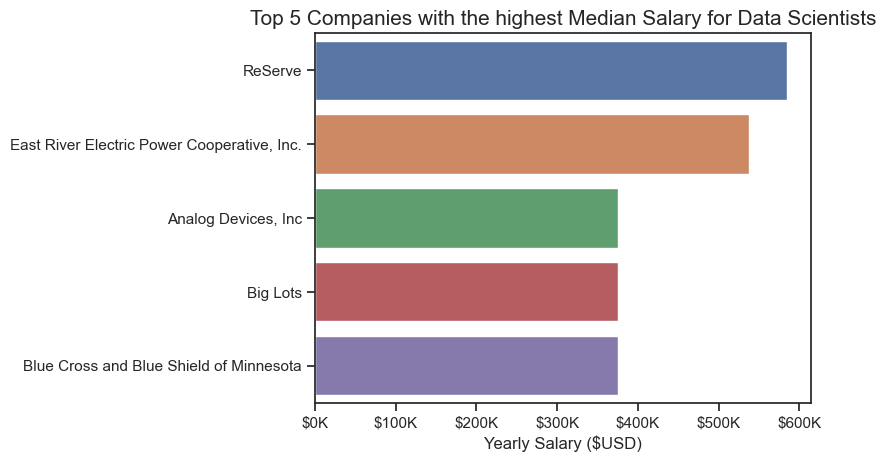

In [80]:
df_us_ds = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].copy()
df_us_ds = df_us_ds.dropna(subset=['salary_year_avg'])
top_5_firms = df_us_ds.groupby('company_name')['salary_year_avg'].median().nlargest(5).reset_index()

sns.barplot(data=top_5_firms, x='salary_year_avg', y='company_name', hue='company_name')
plt.title('Top 5 Companies with the highest Median Salary for Data Scientists', fontsize=15)
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.show()

### Data Scientist Salary Histogram
Create a histogram using Seaborn to visualize the distribution of average yearly salaries (use the salary_year_avg column) for Data Scientist job postings in the United States:

- Filter the DataFrame to include only job postings in the United States and remove any entries with missing yearly salary values.
- Use 25 bins for the histogram and set the x-axis limit to 700,000.
- Set the title to 'Distribution of Yearly Salaries for Data Scientist in the United States' and label the y-axis 'Number of Jobs' and x-axis 'Yearly Salary (USD)'.

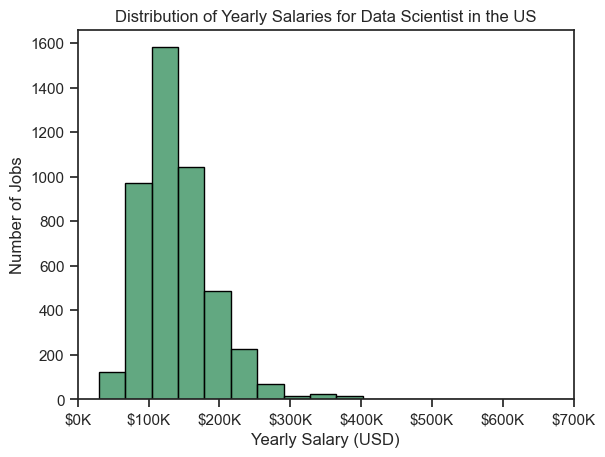

In [103]:
df_us_ds = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].copy()
df_us_ds = df_us_ds.dropna(subset=['salary_year_avg'])


sns.histplot(df_us_ds['salary_year_avg'], bins=25, kde=False, color='seagreen', edgecolor='black')
plt.title('Distribution of Yearly Salaries for Data Scientist in the US')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Number of Jobs')
plt.xlim(0, 700000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.show()

### Data Roles Salary Box Plot
Create a box plot using Seaborn to compare the yearly salaries (use the salary_year_avg column) of Data Analyst, Data Engineer, and Data Scientist job postings in India:

- Filter the DataFrame to include only job postings in India and remove any entries with missing yearly salary values.
- Set the x-axis limit to 300,000 and format it as $100k.
- Set the title to 'Yearly Salary Comparison for Data Roles in India' and label the x-axis as 'Yearly Salary (USD)'.

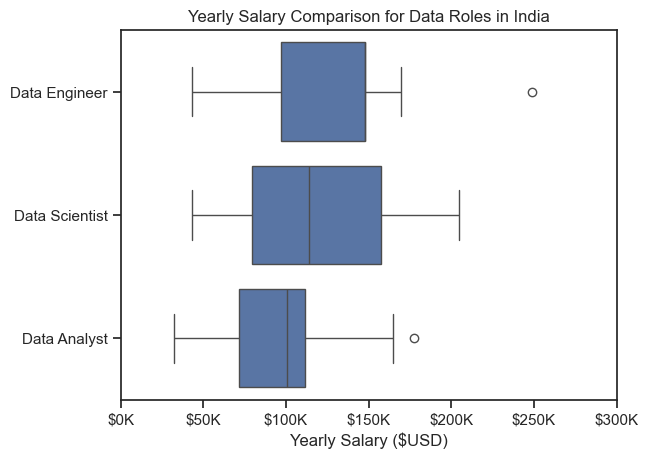

In [114]:
df_job_ind = df[(df['job_country'] == 'India') & (df['job_title_short'].isin(job_titles))].copy()
df_job_ind = df_job_ind.dropna(subset=['salary_year_avg'])

sns.boxplot(data=df_job_ind, x='salary_year_avg', y='job_title_short')
plt.title('Yearly Salary Comparison for Data Roles in India')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
plt.xlim(0, 300000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

###  Salary Distribution for United States
Create a violin plot using Seaborn to visualize the distribution of salary_year_avg for Data Scientist roles in the United States.
Ensure the plot includes a title, axis labels, and custom formatting for the salary axis.

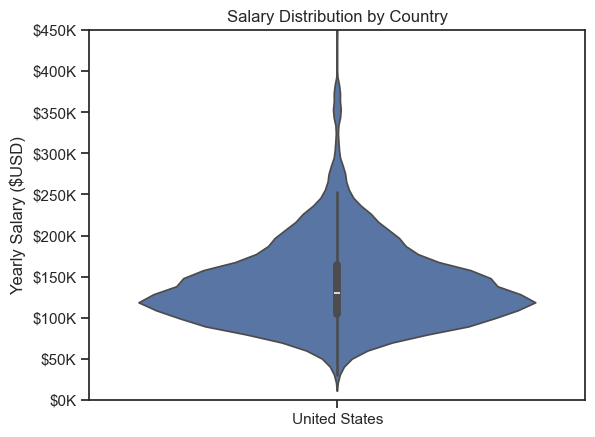

In [127]:
df_us_ds = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].copy()
df_us_ds = df_us_ds.dropna(subset=['salary_year_avg'])

sns.violinplot(data=df_us_ds, x='job_country', y='salary_year_avg')
plt.title('Salary Distribution by Country')
plt.xlabel('')
plt.ylabel('Yearly Salary ($USD)')
plt.ylim(0, 450000)
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.show()